In [245]:
from bs4 import BeautifulSoup as soup
import requests
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

In [246]:
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36'}

In [247]:
url_honey_bunches = 'https://www.walmart.com/search/?query=honey%20bunch%20of%20oats'

In [248]:
html = requests.get(url_honey_bunches, headers = header)

In [249]:
bs_obj = soup(html.content, 'lxml')

In [250]:
#Fetching URL
product_url = bs_obj.findAll('a', {'class':'product-title-link line-clamp line-clamp-2 truncate-title'})
products_URL = []
for i in range(0,len(product_url)):
    products_URL.append('https://www.walmart.com/' + str(product_url[i])[str(product_url[i]).find('href=')+7:str(product_url[i]).find('lang=')-2])    
products_URL

['https://www.walmart.com/ip/Post-Honey-Bunches-Of-Oats-Cereal-Strawberry-20-Oz/618928264',
 'https://www.walmart.com/ip/Post-Frosted-Honey-Bunches-Of-Oats-Cereal-20oz/184176161',
 'https://www.walmart.com/ip/Post-Honey-Bunches-of-Oats-with-Crispy-Almonds-Cereal-23-oz-Box/169603333',
 'https://www.walmart.com/ip/Honey-Bunches-of-Oats-Crunchy-Honey-Roasted-Cereal-23-oz-Box/134152596',
 'https://www.walmart.com/ip/Post-Honey-Bunches-of-Oats-Cereal-with-Crispy-Almonds-18-oz/16785100',
 'https://www.walmart.com/ip/Post-Honey-Bunches-Of-Oats-Breakfast-Cereal-Honey-Roasted-18-Oz/16785099',
 'https://www.walmart.com/ip/Honey-Bunches-Of-Oat-Post-Hbo-Almonds-Mega-30-5/274748343',
 'https://www.walmart.com/ip/Honey-Bunches-of-Oats-with-Almonds-48-oz/327734820',
 'https://www.walmart.com/ip/Post-Honey-Bunches-of-Oats-Crunchy-Honey-Roasted-Granola-11-oz/28198786']

In [251]:
products_desc_reviews_URL = []
for i in range(0,len(products_URL)):
    products_desc_reviews_URL.append('https://www.walmart.com/reviews/product/' + str(products_URL[i])[str(products_URL[i]).rfind('/')+1:len(products_URL[i])])
products_desc_reviews_URL

['https://www.walmart.com/reviews/product/618928264',
 'https://www.walmart.com/reviews/product/184176161',
 'https://www.walmart.com/reviews/product/169603333',
 'https://www.walmart.com/reviews/product/134152596',
 'https://www.walmart.com/reviews/product/16785100',
 'https://www.walmart.com/reviews/product/16785099',
 'https://www.walmart.com/reviews/product/274748343',
 'https://www.walmart.com/reviews/product/327734820',
 'https://www.walmart.com/reviews/product/28198786']

In [265]:
url_list = []
for i in range(0, len(products_desc_reviews_URL)):
    for j in range(1,7):
        url_list.append(products_desc_reviews_URL[i] + '?page=' + str(j))

In [266]:
user_name = []
user_date = []
user_review = []
user_review_rating= []
for url in url_list:
    result = requests.get(url, headers=header)
    bs_obj = soup(result.content, 'lxml')
    
    cust_name = bs_obj.findAll('span', {'class':'review-footer-userNickname'})
    review_date = bs_obj.findAll('span', {'class': 'review-date-submissionTime'})
    review = bs_obj.findAll('div', {'class':'review-text'})
    review_rating = bs_obj.findAll('span', {'class': 'visuallyhidden seo-avg-rating'})
    for name, rev_date, rev, rev_rating in zip(cust_name, review_date, review, review_rating):
    #for name, rating, review_count, price in zip(product_name, product_rating, product_review_count, product_price):
        #".text allows to fetch the content present inside the tag of "span"
        #print(name)
        user_name.append(name.text)
        user_date.append(rev_date.text)
        user_review.append(rev.text)
        user_review_rating.append(rev_rating.text)
        '''
        cust_name.append(name.a.span.text.strip())
        review_date.append(rating.text)
        review.append(review_count.text.replace('ratings',''))
        rev_rating.append(price.findAll('span', {'class': 'visuallyhidden'})[0].text)
        '''

In [267]:
#Creating a dataframe
df_honey_bunches = pd.DataFrame({'Customer_name': user_name, 'Review_date':user_date, 'Text': user_review, 'Rating':user_review_rating},
                           columns=['Customer_name', 'Review_date', 'Text', 'Rating'])
df_honey_bunches.head()

,Customer_name,Review_date,Text,Rating
0,TROY,"October 4, 2020",This is the best flavor they make to me and a ...,4.6
1,Elena,"October 7, 2020",Delicious! Lots of strawberries,5.0
2,hug1,"July 12, 2020","I really like this cereal, and it was very han...",2.0
3,oma6,"August 14, 2020","Yum, me and granddaughter",5.0
4,Janice,"August 16, 2020",This is great cereal and I'm not a cold cereal...,2.0


In [277]:
df_honey_bunches.drop_duplicates(inplace=True)

# Data Analysis on text reviews for Honey Bunches of Oats

In [279]:
df_honey_bunches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 252
Data columns (total 4 columns):
Customer_name    245 non-null object
Review_date      245 non-null object
Text             245 non-null object
Rating           245 non-null object
dtypes: object(4)
memory usage: 9.6+ KB


In [280]:
# Iterating each row of dataframe 
all_words = ''
for row in df_honey_bunches['Text']: 
    row = str(row) 
    row_split = row.split() 
    for j in range(len(row_split)): 
        row_split[j] = row_split[j].lower() 
      
    all_words += " ".join(row_split)+" "

In [281]:
# Creating the WordCloud
honey_bunches_wordcloud = WordCloud(width = 1200, height = 800, 
                            background_color ='white', 
                            stopwords = STOPWORDS, 
                            min_font_size = 10).generate(all_words)

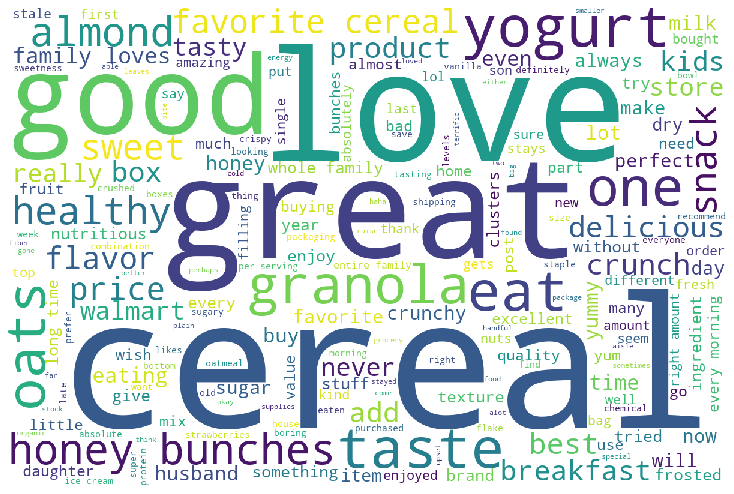

In [282]:
# Displaying the WordCloud                    
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(honey_bunches_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

***Inference: Above word cloud shows that most of the reviews contains the positive words. Hence, it can be concluded that the product is performing well in the market.***

In [283]:
df_honey_bunches

,Customer_name,Review_date,Text,Rating
0,TROY,"October 4, 2020",This is the best flavor they make to me and a ...,4.6
1,Elena,"October 7, 2020",Delicious! Lots of strawberries,5.0
2,hug1,"July 12, 2020","I really like this cereal, and it was very han...",2.0
3,oma6,"August 14, 2020","Yum, me and granddaughter",5.0
4,Janice,"August 16, 2020",This is great cereal and I'm not a cold cereal...,2.0
...,...,...,...,...
248,Annie,"October 22, 2017",This is so good in my yogurt. I also love it ...,5.0
249,rkb2,"November 14, 2015",U get more for the buck,5.0
250,Miranda,"September 8, 2015",Great for kids lunch. Healthy alternative for ...,5.0
251,Julie,"September 3, 2015",This is my most favorite granola !!,5.0


In [285]:
df_honey_bunches['text_length'] = df_honey_bunches['Text'].apply(len)

,Customer_name,Review_date,Text,Rating,text_length
0,TROY,"October 4, 2020",This is the best flavor they make to me and a ...,4.6,116
1,Elena,"October 7, 2020",Delicious! Lots of strawberries,5.0,32
2,hug1,"July 12, 2020","I really like this cereal, and it was very han...",2.0,111
3,oma6,"August 14, 2020","Yum, me and granddaughter",5.0,25
4,Janice,"August 16, 2020",This is great cereal and I'm not a cold cereal...,2.0,53


In [286]:
df_honey_bunches

,Customer_name,Review_date,Text,Rating,text_length
0,TROY,"October 4, 2020",This is the best flavor they make to me and a ...,4.6,116
1,Elena,"October 7, 2020",Delicious! Lots of strawberries,5.0,32
2,hug1,"July 12, 2020","I really like this cereal, and it was very han...",2.0,111
3,oma6,"August 14, 2020","Yum, me and granddaughter",5.0,25
4,Janice,"August 16, 2020",This is great cereal and I'm not a cold cereal...,2.0,53
...,...,...,...,...,...
248,Annie,"October 22, 2017",This is so good in my yogurt. I also love it ...,5.0,63
249,rkb2,"November 14, 2015",U get more for the buck,5.0,23
250,Miranda,"September 8, 2015",Great for kids lunch. Healthy alternative for ...,5.0,52
251,Julie,"September 3, 2015",This is my most favorite granola !!,5.0,35


# Sentiment Analysis

In [288]:
vader = SentimentIntensityAnalyzer()
review_polarity_score = []
for i in df_honey_bunches['Text']:
    review_polarity_score.append(vader.polarity_scores(i)['compound'])
df_honey_bunches['Polarity_score'] = review_polarity_score
df_honey_bunches['Sentiment'] =''

In [317]:
mask = (df_honey_bunches['Polarity_score'] > 0.05) 
df_honey_bunches['Sentiment'][mask] = 'Positive'
mask = (df_honey_bunches['Polarity_score'] < -0.05)
df_honey_bunches['Sentiment'][mask] = 'Negative'
mask = (df_honey_bunches['Polarity_score'] >= -0.05) & (df_honey_bunches['Polarity_score'] <= 0.05)
df_honey_bunches['Sentiment'][mask] = 'Neutral'

C:\Users\pathak.as\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [326]:
df_honey_bunches

,Customer_name,Review_date,Text,Rating,text_length,Polarity_score,Sentiment
0,TROY,"October 4, 2020",This is the best flavor they make to me and a ...,4.6,116,0.3818,Positive
1,Elena,"October 7, 2020",Delicious! Lots of strawberries,5.0,32,0.6114,Positive
2,hug1,"July 12, 2020","I really like this cereal, and it was very han...",2.0,111,0.4201,Positive
3,oma6,"August 14, 2020","Yum, me and granddaughter",5.0,25,0.0000,Neutral
4,Janice,"August 16, 2020",This is great cereal and I'm not a cold cereal...,2.0,53,0.3226,Positive
...,...,...,...,...,...,...,...
248,Annie,"October 22, 2017",This is so good in my yogurt. I also love it ...,5.0,63,0.7870,Positive
249,rkb2,"November 14, 2015",U get more for the buck,5.0,23,0.0000,Neutral
250,Miranda,"September 8, 2015",Great for kids lunch. Healthy alternative for ...,5.0,52,0.7783,Positive
251,Julie,"September 3, 2015",This is my most favorite granola !!,5.0,35,0.5963,Positive


In [328]:
df_honey_bunches.to_csv('Honey_Bunches_of_Oats_Reviews_Walmart.csv', index=False)

***Conclusion: Above dataset has been scraped and analyzed by using BeautifulSoup and NLTK libraries, along with appropriate pre-processing. Now, insights can be extracted out from the dataset by using Tableau as a data visualization tool.***